In [1]:
# Relevance => Similarity(Likelihood, Bayes, ...)
#           => Vector Space

# Dimension => Concepts (Orthogonal, Independent) = Bag of words
#           => Term(Token), Class(Category), Cluster...

# v = {w1, w2, ..., wn}
# Q = {t1, t2, ..., tn} ㅌ v
# Di = {ti1, ti2, ..., tin} ㅌ v
# C = {d1, d2, ..., di}
# Rel(Q,D) = Sim(Q, D) => Sim(Rep(Q), Rep(D))

# Document-Term Matrix (DTM) => 색인(느림 왜? bottleneck 존재)
# bottleneck 제거를 위해 Term-Document Matrix(TDM) => 역색인 (Linked List 형태로 바꾸자)
# in-memory       on-disk(Inverted Index)
# Term1       - Doc1, Doc2, ...

#                                                 Zipf
# Rep? => Dim 에서 얼마나 중요한지 (Importance => Weight(문서 내 많이 나온 표현은 중요TF, 다른 문서에서 안나오는 표현은 중요IDF) 로 측정)

In [2]:
# TF normalization
# 빈도수에 따라서 애들의 가중치가 달라지기 때문에...
# TF만 쓰면 부정확함
# 왜? 진짜 중요한 내용을 담거나, 단순 반복일 수도 있기 때문에
# 길면 길수록 penalty를 받음
# 결과적으로 TF를 linear에서 non-linear로 바꾸는 작업
# log를 씌워서 반복이 많이 받은 애들과 적게 받은 애들 간의 gap을 너무 크게 만들지 않도록 함

# TF scailing = double normalization

# TF normalization
# binary = 존재하는지 안하는지만 판단
# term freq = 비율을 만듦, 0부터 1까지의 소수점으로 gap을 만듦

In [3]:
from math import log
# tf normalization 식을 lambda로 만들어봄
tf1 = lambda f: 1 if f>0 else 0
tf2 = lambda f: f
tf3 = lambda f, s: f/s
tf4 = lambda f: log(1+f)
tf5 = lambda f, m: 0.5 + 0.5*(f/m)
tf6 = lambda k, f, m: k + (1-k)*(f/m)

In [4]:
import matplotlib.pyplot as plt

In [5]:
# 시각화 해보기
f = [1,10,100,1000,10000]

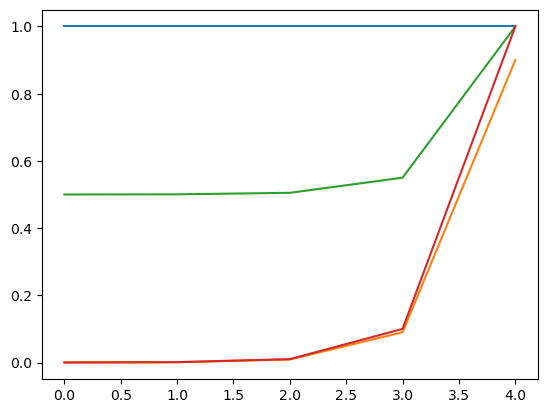

In [12]:
plt.plot([tf1(v) for v in f])               # boolean
# plt.plot([tf2(v) for v in f])             # raw freq
plt.plot([tf3(v, sum(f)) for v in f])       # normalization
# plt.plot([tf4(v) for v in f])             # log
plt.plot([tf5(v, max(f)) for v in f])       # k=.5 double normalization
plt.plot([tf6(0, v, max(f)) for v in f])    # K, double normalization